In [1]:
%pip install matplotlib -q


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import re

def plot(log_filepath, variant: str):# Liste per memorizzare i dati
    epochs = []
    losses = []
    grad_norms = []
    learning_rates = []
    eval_losses = []
    eval_epochs = []

    # Leggere il file di log e estrarre i dati
    with open(log_filepath, 'r') as file:
        for line in file:
            match = re.search(r"'loss': ([\d.]+), 'grad_norm': ([\d.]+), 'learning_rate': ([\de.-]+), 'epoch': ([\d.]+)", line)
            eval_match = re.search(r"'eval_loss': ([\d.]+), .* 'epoch': ([\d.]+)", line)
            if match:
                losses.append(float(match.group(1)))
                grad_norms.append(float(match.group(2)))
                learning_rates.append(float(match.group(3)))
                epochs.append(float(match.group(4)))
            elif eval_match:
                eval_losses.append(float(eval_match.group(1)))
                eval_epochs.append(float(eval_match.group(2)))

    # Creare il grafico
    plt.figure(figsize=(10, 8))

    # Grafico della perdita (loss)
    plt.subplot(4, 1, 1)
    plt.plot(epochs, losses, label='Training Loss', color='blue')
    plt.plot(eval_epochs, eval_losses, label='Evaluation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Evaluation Loss ({variant.capitalize()})')
    plt.legend()

    # Grafico della norma del gradiente (grad_norm)
    plt.subplot(4, 1, 2)
    plt.plot(epochs, grad_norms, label='Grad Norm', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Grad Norm')
    plt.title('Gradient Norm')
    plt.legend()

    # Grafico del tasso di apprendimento (learning_rate)
    plt.subplot(4, 1, 3)
    plt.plot(epochs, learning_rates, label='Learning Rate', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate')
    plt.legend()

    # Mostrare il grafico
    plt.tight_layout()
    plt.show()

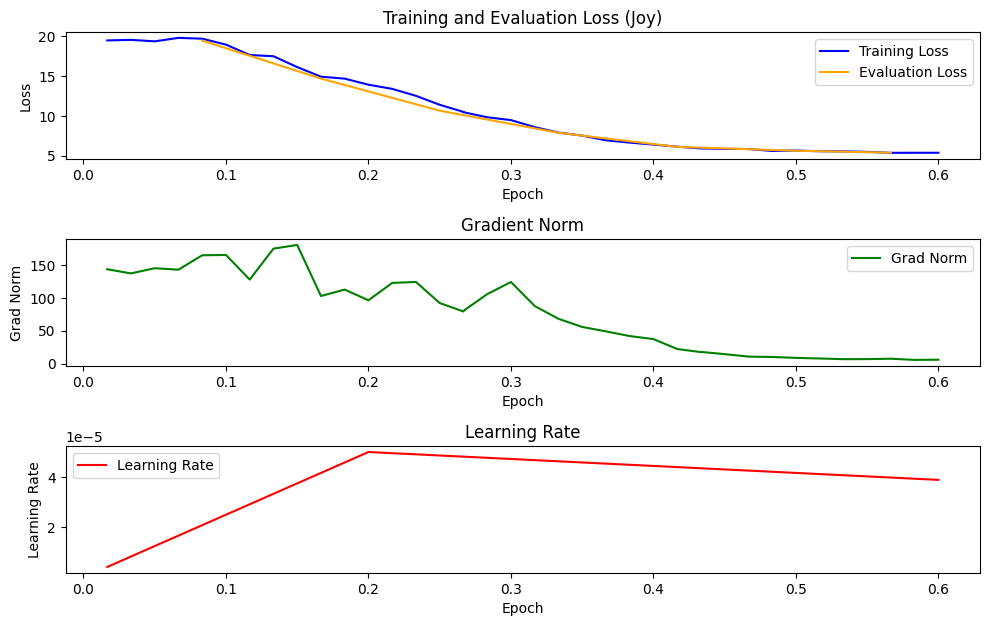

In [5]:
plot('/Users/manuel/PersonalProjects/thesis/training-joy.log', "joy")

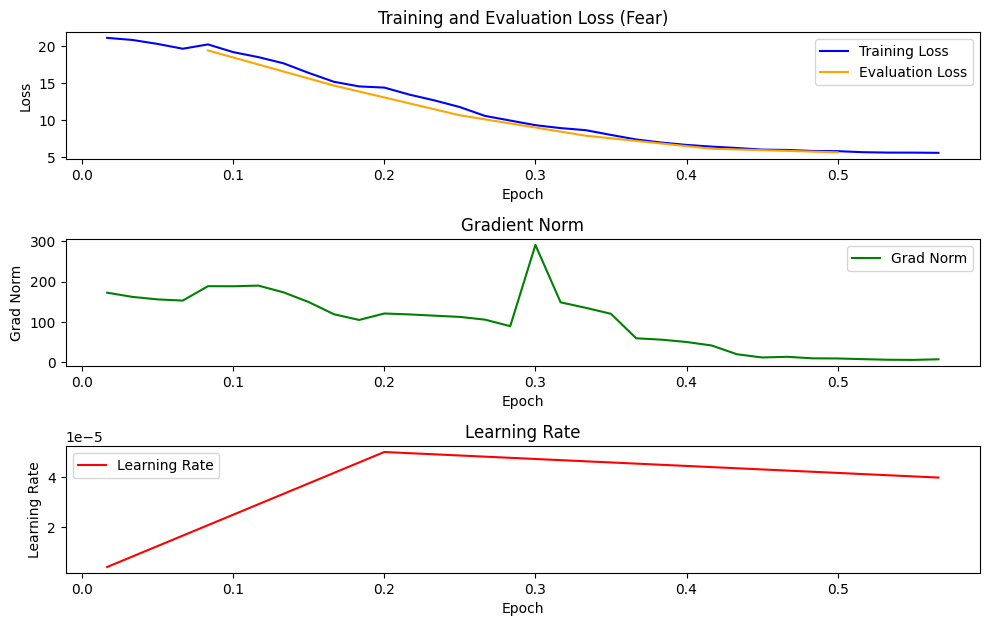

In [6]:
plot('/Users/manuel/PersonalProjects/thesis/training-fear.log', "fear")

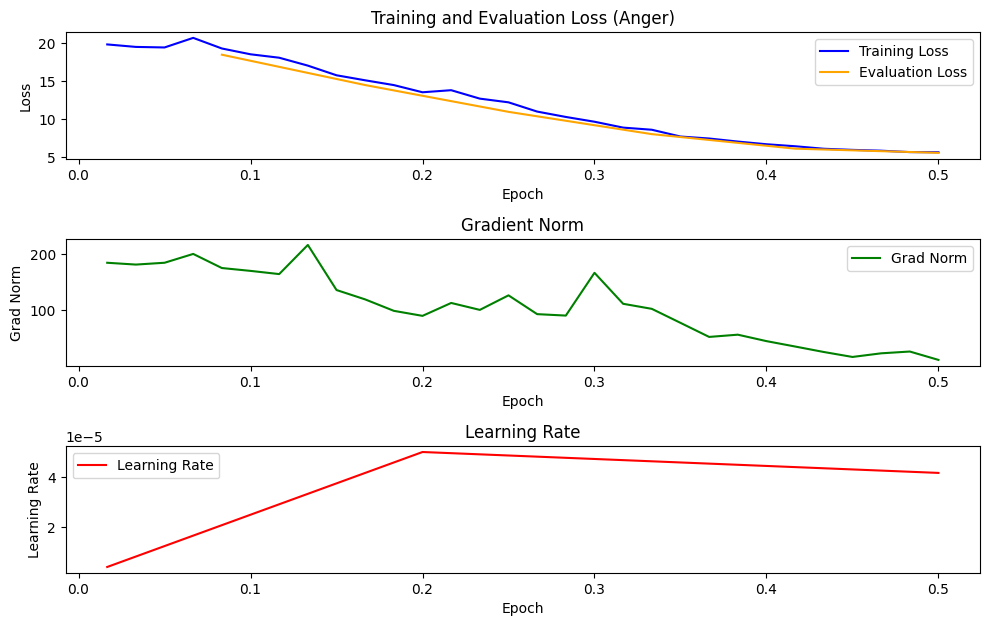

In [7]:
plot('/Users/manuel/PersonalProjects/thesis/training-anger.log', "anger")